## ATU -Programming for Data Analysis, Winter 2023/24
## Project 1
##### Author: Norbert Antal

## **UFO Sightings**

This project aims to create a synthetic dataset of at least 4 different variables that is simulating the real-world phenomenon of UFO sightings.
The sample dataset, curated by The National UFO Reporting Center (NUFORC), was downloaded from Kaggle.
It contains data from UFO sightings spanning 1906 to 2014. The dataset consists of 80,332 records, encompassing information like date and time of the sightings, with months and years separately listed, also the season, event location, duration, UFO shape, and witness reports of the events. 

###### sample dataset ref: https://www.kaggle.com/datasets/jonwright13/ufo-sightings-around-the-world-better/data


In [117]:
# required python modules
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [118]:
# Load data
df=pd.read_csv('Datasets/UFO.csv')
print(df.dtypes) #check data types
df.head() # check structure

Unnamed: 0                       int64
Date_time                       object
date_documented                 object
Year                             int64
Month                            int64
Hour                             int64
Season                          object
Country_Code                    object
Country                         object
Region                          object
Locale                          object
latitude                       float64
longitude                      float64
UFO_shape                       object
length_of_encounter_seconds    float64
Encounter_Duration              object
Description                     object
dtype: object


,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,10/10/1949 20:30,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,10/10/1949 21:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,10/10/1955 17:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,10/10/1956 21:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,10/10/1960 20:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [119]:
df.describe() #investigate numeric data

,Unnamed: 0,Year,Month,Hour,latitude,longitude,length_of_encounter_seconds
count,80328.000000,80328.000000,80328.000000,80328.000000,80328.000000,80328.000000,8.032800e+04
mean,40163.500000,2003.850463,6.835026,15.525172,38.124963,-86.772015,9.017336e+03
std,23188.840549,10.426547,3.234876,7.753750,10.469146,39.697805,6.202322e+05
min,0.000000,1906.000000,1.000000,0.000000,-82.862752,-176.658056,1.000000e-03
25%,20081.750000,2001.000000,4.000000,10.000000,34.134722,-112.073333,3.000000e+01
50%,40163.500000,2006.000000,7.000000,19.000000,39.412500,-87.903611,1.800000e+02
75%,60245.250000,2011.000000,9.000000,21.000000,42.788333,-78.755000,6.000000e+02
max,80327.000000,2014.000000,12.000000,23.000000,72.700000,178.441900,9.783600e+07


In [120]:
#convert variables with datetime data to datetime objects
df['Date_time'] = pd.to_datetime(df['Date_time'], errors='coerce') # errors='coerce' ref: https://www.kaggle.com/code/walidkw/ufo-sightings-professional-data-analysis-more (
df['date_documented'] = pd.to_datetime(df['date_documented'], errors='coerce')
#dropped description as text analysis is beyodnd the scope of this project.
df = df.drop('Description', axis=1) #drop column - ref: https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
df['counter']=1 #add counter column

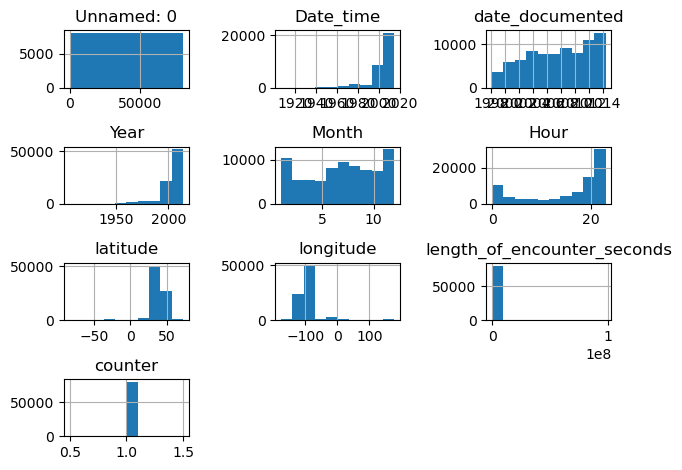

In [121]:
# check data shape
df.hist()
plt.tight_layout()

Text(0.5, 1.0, 'Actual')

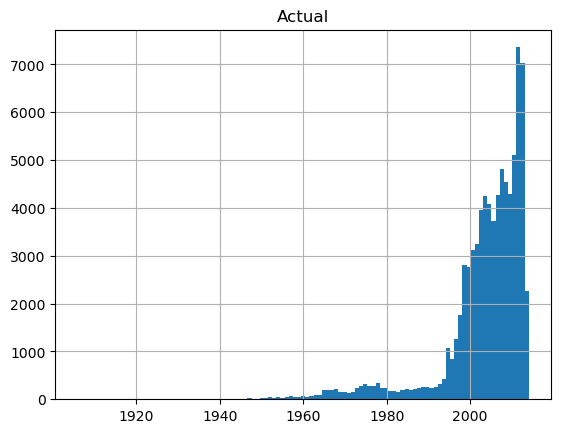

In [122]:
# interesting data
df['Year'].hist(bins=df['Year'].max()-df['Year'].min()+1) #get exact number of bins (+1 as count starts from 0)
df['Year'].describe()
plt.title("Actual")
# total number of observations increased significantly over the years

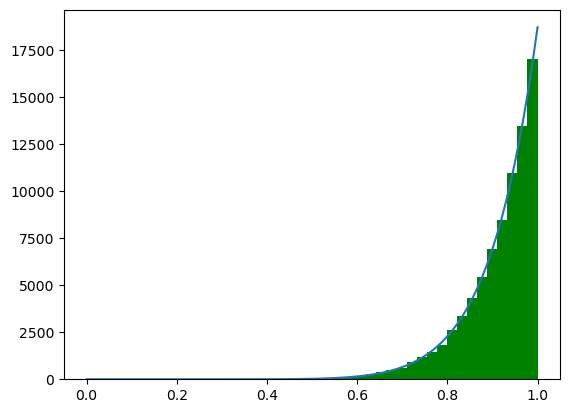

In [123]:
# Power distribution: https://numpy.org/doc/stable/reference/random/generated/numpy.random.power.html

a = df['Year'].std() # shape
samples = df['Year'].count()
s = np.random.power(a, samples)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, bins=30,color="g")
x = np.linspace(0, 1, 100)
y = a*x**(a-1.)
normed_y = samples*np.diff(bins)[0]*y
plt.plot(x, normed_y)
plt.show()


Text(0.5, 1.0, 'Actual')

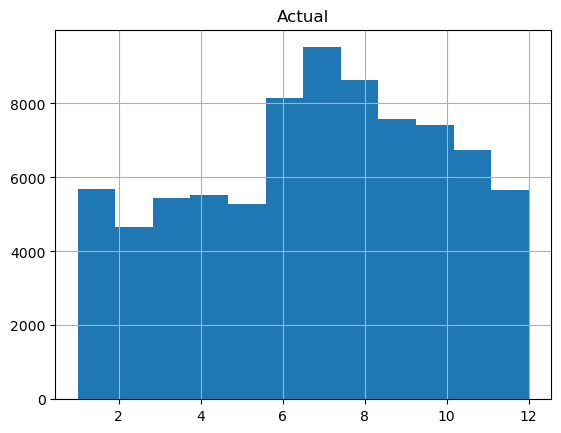

In [124]:
# interesting data
df['Month'].hist(bins=(df['Month'].max())) #matching number of monts with bins to represent data properly
df['Month'].describe()
plt.title("Actual")
# summer and autumn months are most prominent

array([7.15612971, 8.47884818, 7.57864561, ..., 9.51856129, 7.85082244,
       7.05513235])

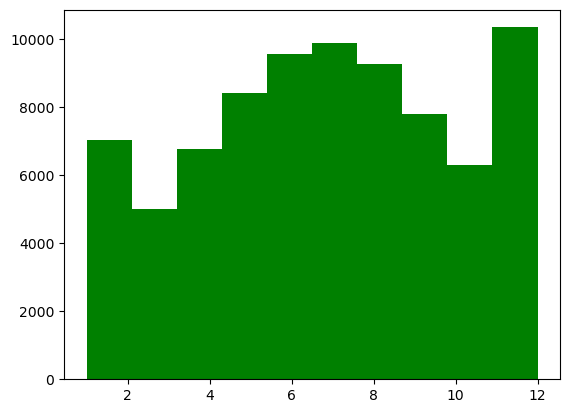

In [125]:
# model Months with Normal distribution

# Number of samples
samples = df['Month'].count()

# Generate random samples from a normal distribution
mu, sigma = df['Month'].mean(), df['Month'].std()
rng = np.random.normal(mu, sigma, samples)

# Map the random numbers to months
randMonths = rng.round() #round numbers to get the integer
randMonths= randMonths.astype(int) #float array to integer array #ref: https://en.moonbooks.org/Articles/How-to-convert-a-float-array-to-an-integer-array-in-python-/
randMonths= np.abs(randMonths) #get absolute value to remove negatives ref: https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
randMonths = np.clip(randMonths, 1, 12)  # Clip values to the month range (1, 12) ref: https://www.tutorialspoint.com/clip-limit-the-values-in-a-numpy-array#:~:text=To%20clip%20(limit)%20the%20values,clipped%20to%20the%20interval%20edges.

# Display the generated random months
randMonths=np.sort(randMonths)
plt.hist(randMonths,color='g')
rng
# cliping is a problem - norm dist is not suitable

array([9, 9, 8, ..., 8, 8, 9])

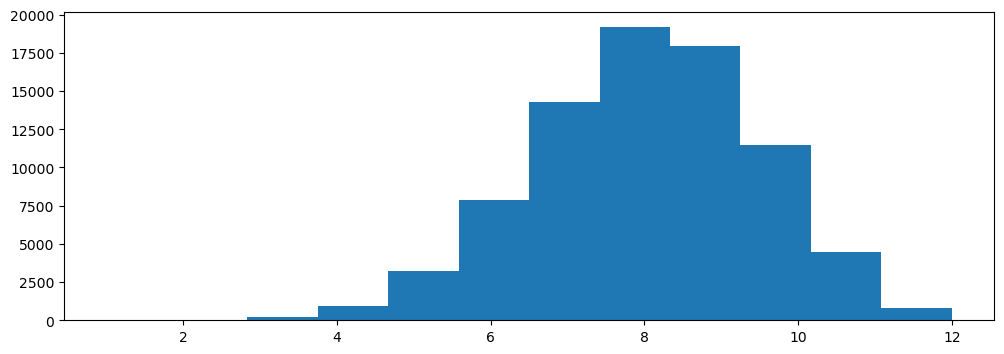

In [126]:
# Binominal distribution
# ref: # https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

#12 months, 80% chance
n, p = 12, 0.68   # n= number of trials/experiments/coins(1),
                # p= probability of each trial (50%)
rand_coins = np.random.binomial(n, p, df['Month'].count())
# coinflipping x100
# create bar plot 
fig, ax = plt.subplots(figsize=(12,4))
#count unique values in the array:
x, counts = np.unique(rand_coins, return_counts=True)
#Create bar chart
#ax.bar(x, counts)
#print(rand_coins)
plt.hist(rand_coins,bins=12)
rand_coins

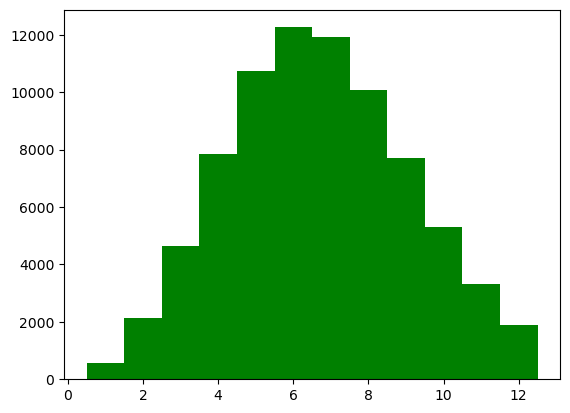

array([ 6,  7,  7, ...,  7, 14,  7])

In [127]:
# model Months with Poisson ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html

# Number of samples
samples = df['Month'].count()

# Poisson distribution
lam = df['Month'].mean()  # lambda = Mean
rng = np.random.poisson(lam, samples) 

randMonths=rng

# plot
randMonths = np.sort(randMonths)
plt.hist(randMonths, bins=np.arange(1, 14) - 0.5, color='g')  
plt.show()
rng

#how to get poisson to chose lower months more often??

count    80328.000000
mean        15.525172
std          7.753750
min          0.000000
25%         10.000000
50%         19.000000
75%         21.000000
max         23.000000
Name: Hour, dtype: float64

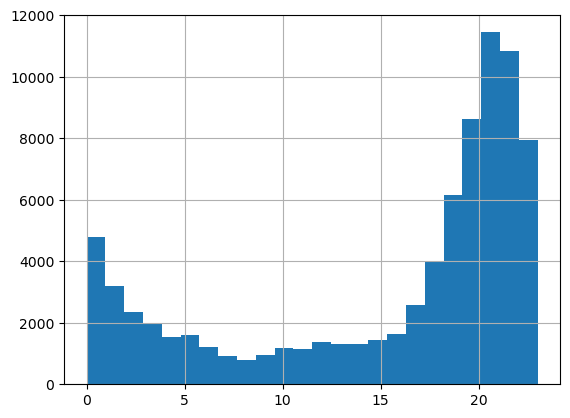

In [128]:
# interesting data

df['Hour'].hist(bins=24)
df['Hour'].describe()
# Dark hours are more likely

In [129]:
df['length_of_encounter_seconds'].max()

97836000.0

0        2700.0
1        7200.0
2          20.0
3          20.0
4         900.0
          ...  
80323     600.0
80324    1200.0
80325    1200.0
80326       5.0
80327    1020.0
Name: length_of_encounter_seconds, Length: 80328, dtype: float64


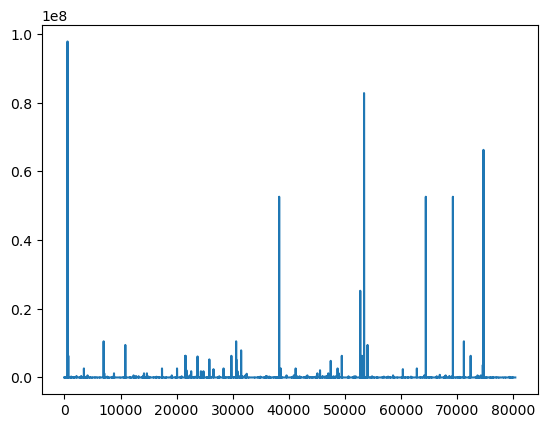

In [130]:
duration=df['length_of_encounter_seconds']
x=np.linspace(duration.min(),duration.max(),10,dtype=int)
plt.plot(duration)
print(duration)

In [131]:
# Categories and labels
cats = [0, 10, 30, 60, 180, 300, 600,6000]
catstext = ["< 10sec", "10-30sec", "30-60sec", "1-3min", "3-5min", "5-10min","10+ mins"]

df['length_of_encounter_seconds'].value_counts()

#how do I slice this??


length_of_encounter_seconds
300.00     8635
120.00     7110
600.00     6312
60.00      5866
180.00     5064
           ... 
199.00        1
1281.00       1
1420.00       1
120.15        1
181.00        1
Name: count, Length: 533, dtype: int64

TypeError: 'value' must be an instance of str or bytes, not a float

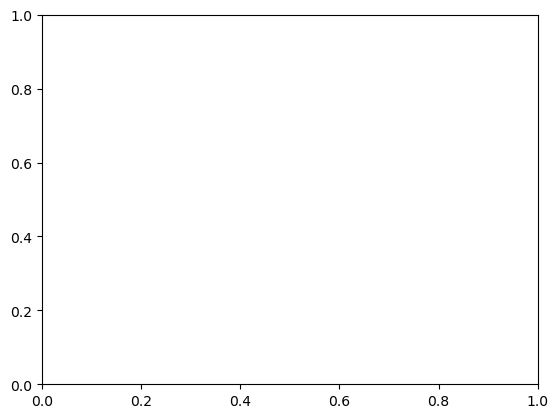

In [159]:
#ufo shape
#df['UFO_shape'].value_counts()
grouped=df.groupby('UFO_shape')['counter'].sum()
x=df['UFO_shape'].unique()
y=grouped.values.astype(int)
#plt.bar(x,y)
plt.bar(x,y)




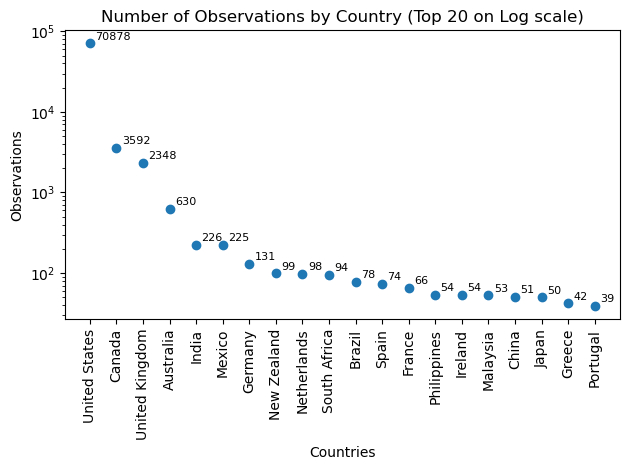

In [133]:
# Observations by Countries
countbycountry = df.groupby(['Country'], as_index=False).sum('counter') # 'as_index=False' re-indexes the dataframe so Countries remain a named column

# Create a DataFrame for observations/country visualization
cbc = pd.DataFrame().assign(Countries=countbycountry['Country'], Observations=countbycountry['counter']) #assign ref: https://sparkbyexamples.com/pandas/pandas-create-new-dataframe-by-selecting-specific-columns/#:~:text=You%20can%20create%20a%20new,added%20to%20the%20original%20ones.

# Rank countries based on the number of observations
sorted= cbc.sort_values(by=['Observations','Countries'], ascending=False) #sort ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
sorted['Rank']=sorted['Observations'].rank(ascending=False) # add ranking ref: https://stackoverflow.com/questions/30425796/pandas-rank-by-column-value
toplot=sorted.head(20) # create mini dataframe toplot with top 20 countries
plt.scatter(toplot['Countries'],toplot['Observations'])
plt.xlabel('Countries')
plt.ylabel('Observations')
plt.title('Number of Observations by Country (Top 20 on Log scale)')
plt.xticks(rotation='vertical')
plt.yscale('log') #logarithmic scale to compensate for US extreme high value

for i, col in enumerate(toplot['Observations']): #get each index and each value from Observations
    plt.text(i+0.2, col*1.05, col, ha='left', va='bottom', fontsize=8)   # plt.text˙(x_coordinate, y_coordinate, value, horizontal pos, vertical pos, fontsize)
                                                                    # chart data labels ref: https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/

plt.tight_layout()
plt.show()

